# Part 2: Exploratory Data Analysis

Generated features will help to understand dynamic properties of historical data. 

## Importing Libraries

In [1]:
%load_ext nb_black #magic command for formmating codes

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import mplfinance as mpf
import seaborn as sns
import warnings
import plotting
import statsmodels.api as sm
from importlib import reload
import numpy as np
import operator
import importlib
import plotly
plotly.offline.init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')
# plt.rcParams['figure.dpi'] = 227 # native screen dpi for my computer

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

## Retrieving Data

In [2]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    # Include only csv files
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)

<IPython.core.display.Javascript object>

### List of Stocks

In [3]:
print('List of stocks:', end=' ')
for i in stocks.keys():
    print(i.upper(), end=' ')

List of stocks: CSCO ORCL EBAY AMZN INTC MSFT EA NVDA FB IBM TWTR NFLX TSLA VMW SHOP GOOG QCOM AAPL 

<IPython.core.display.Javascript object>

## Check for Correlation

In [4]:
stocks['tsla'].corr()[['Return']].sort_values(by='Return', ascending=False)

Return
Return            1.000000
Change            0.670766
Stoch             0.380461
RSI               0.277965
Stoch Signal      0.120914
MACD Singal Diff  0.113108
Close             0.026560
Adj Close         0.026560
MACD              0.008389
High              0.007248
Low               0.006331
MA200             0.003227
Volatility        0.002971
Volume            0.001241
EMA50            -0.000980
MA50             -0.003243
Upper_band       -0.004006
MA7              -0.006354
MA21             -0.006359
Lower_band       -0.009116
Momentum         -0.012113
Open             -0.014690
Signal           -0.031760

<IPython.core.display.Javascript object>

`Return` correlated with `Change` and `RSI`.

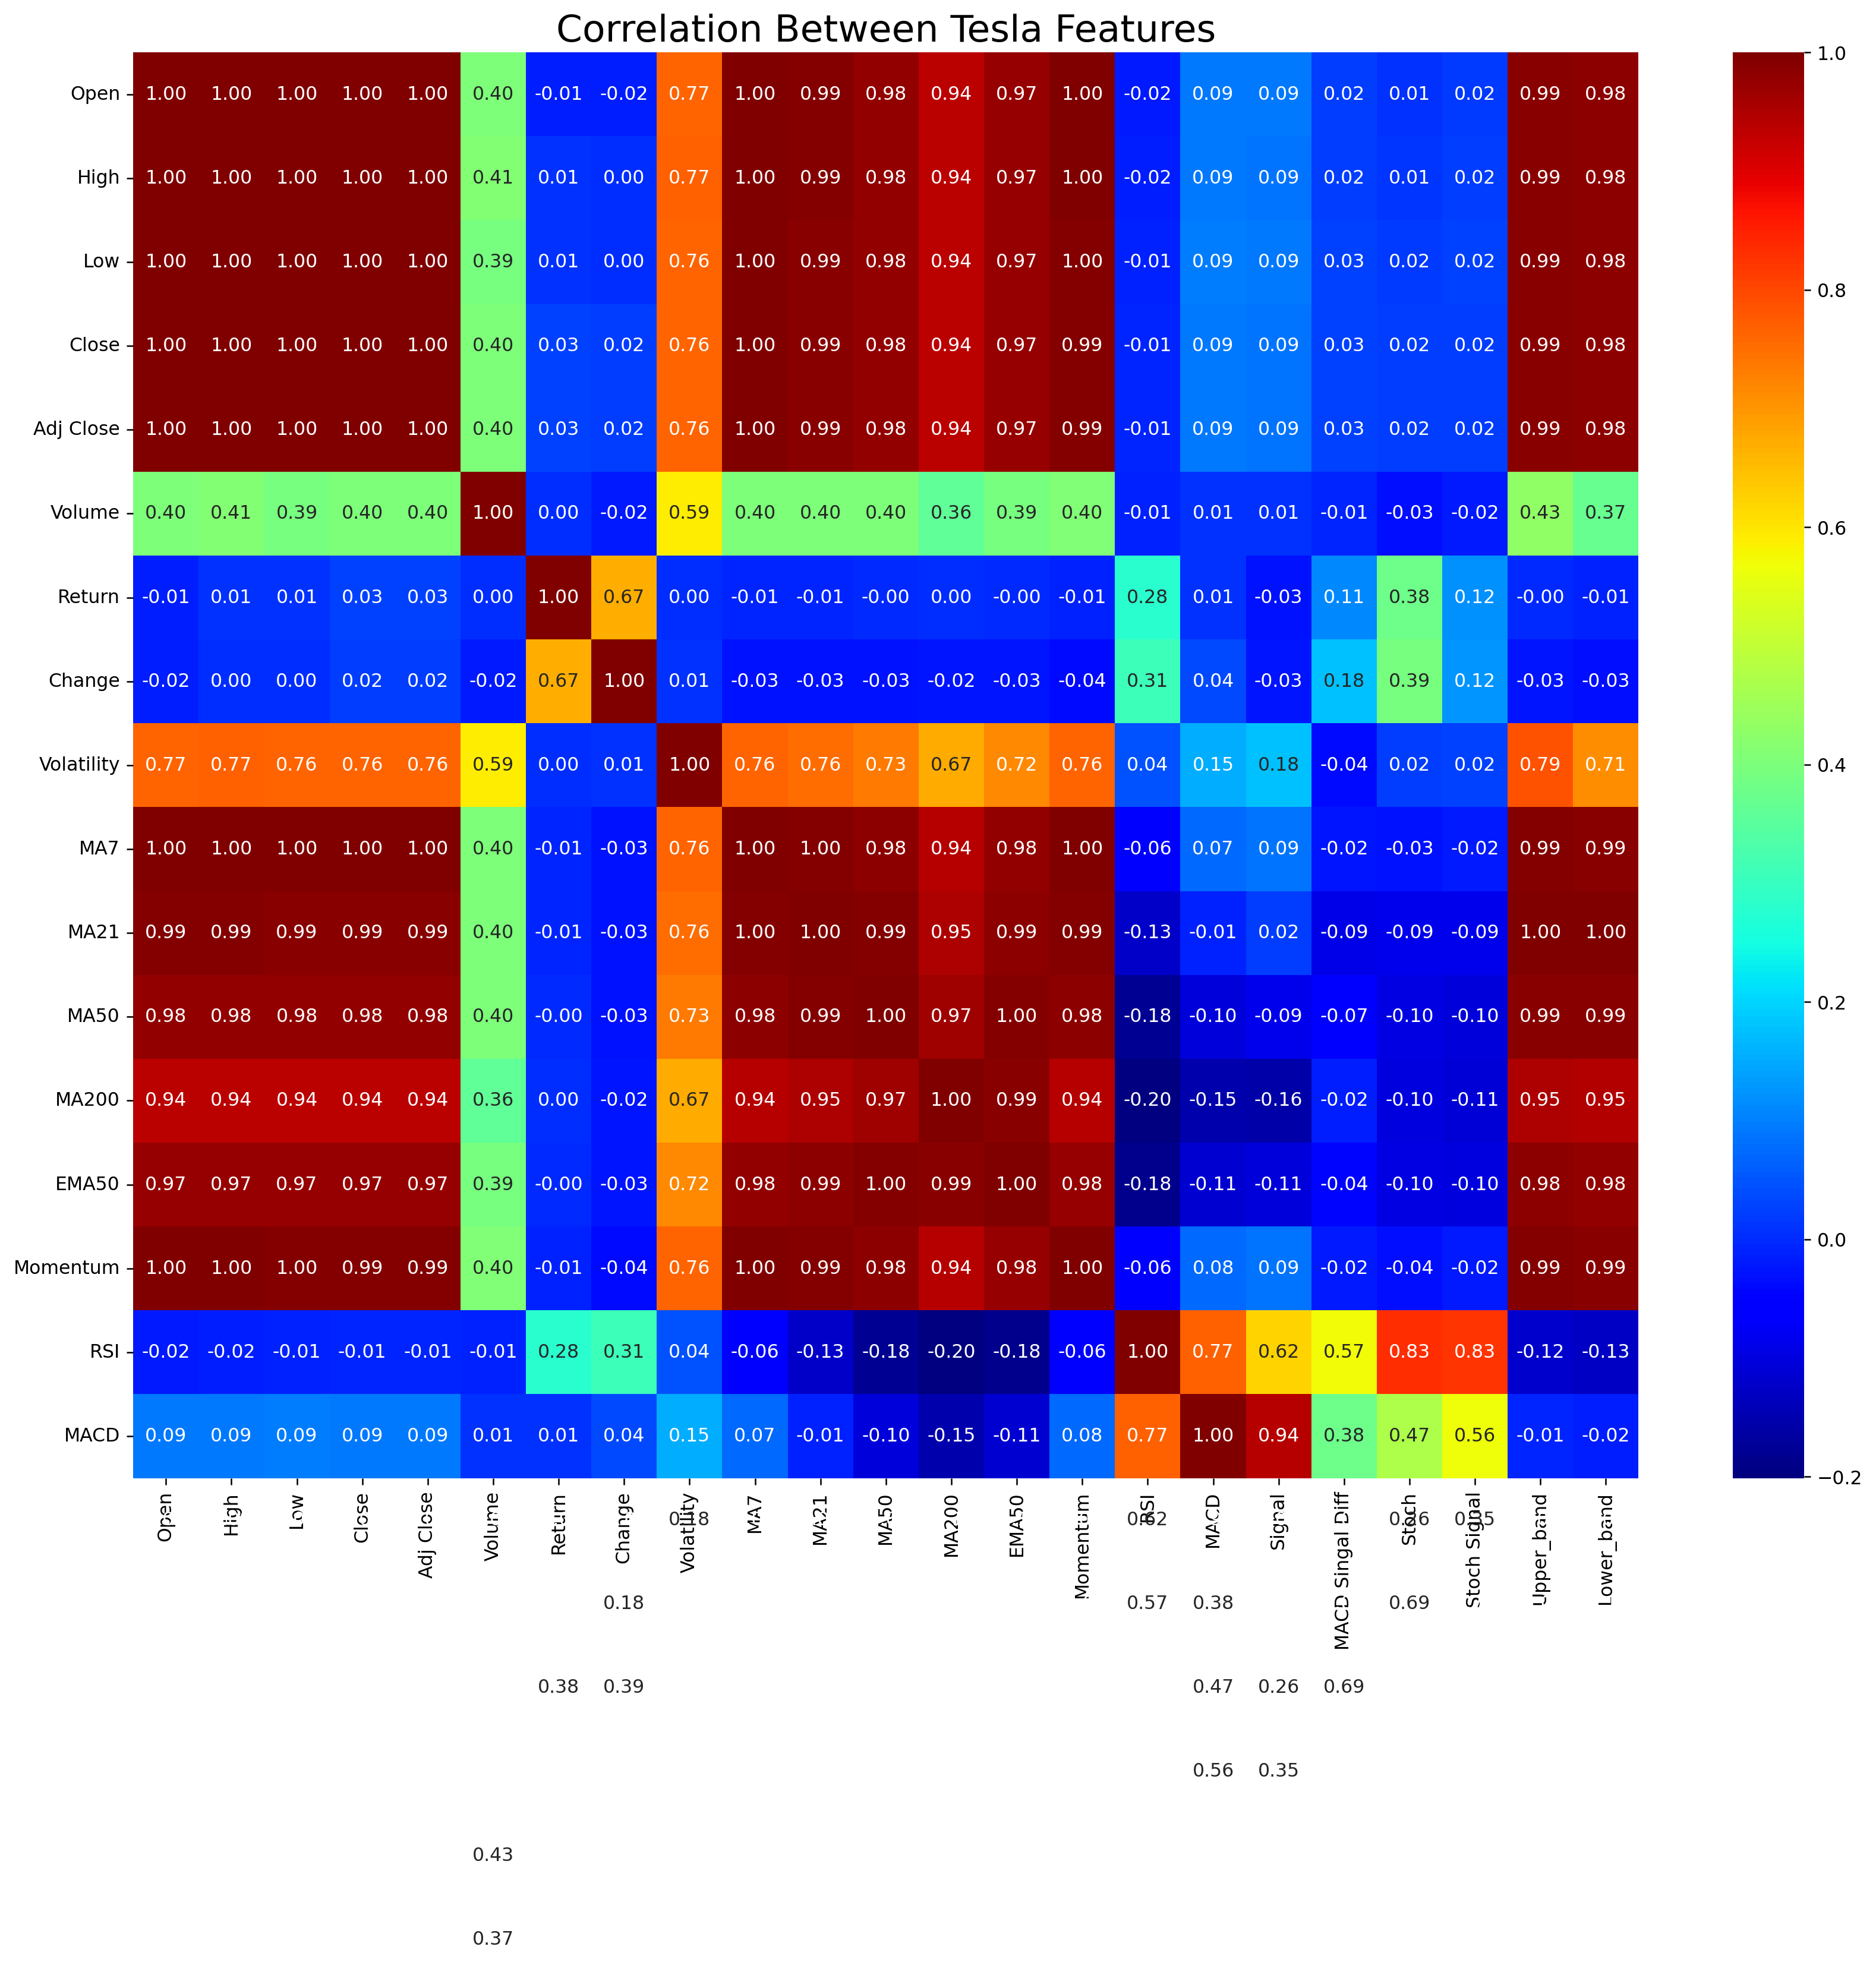

In [78]:
# plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(18,14))
sns.heatmap(stocks['tsla'].corr(), annot=True, fmt='.2f',cmap = 'jet')
plt.ylim(17, 0)
plt.title('Correlation Between Tesla Features', fontsize = 20)
plt.show()

### Bollinger Bands, RSI, MACD, Volume

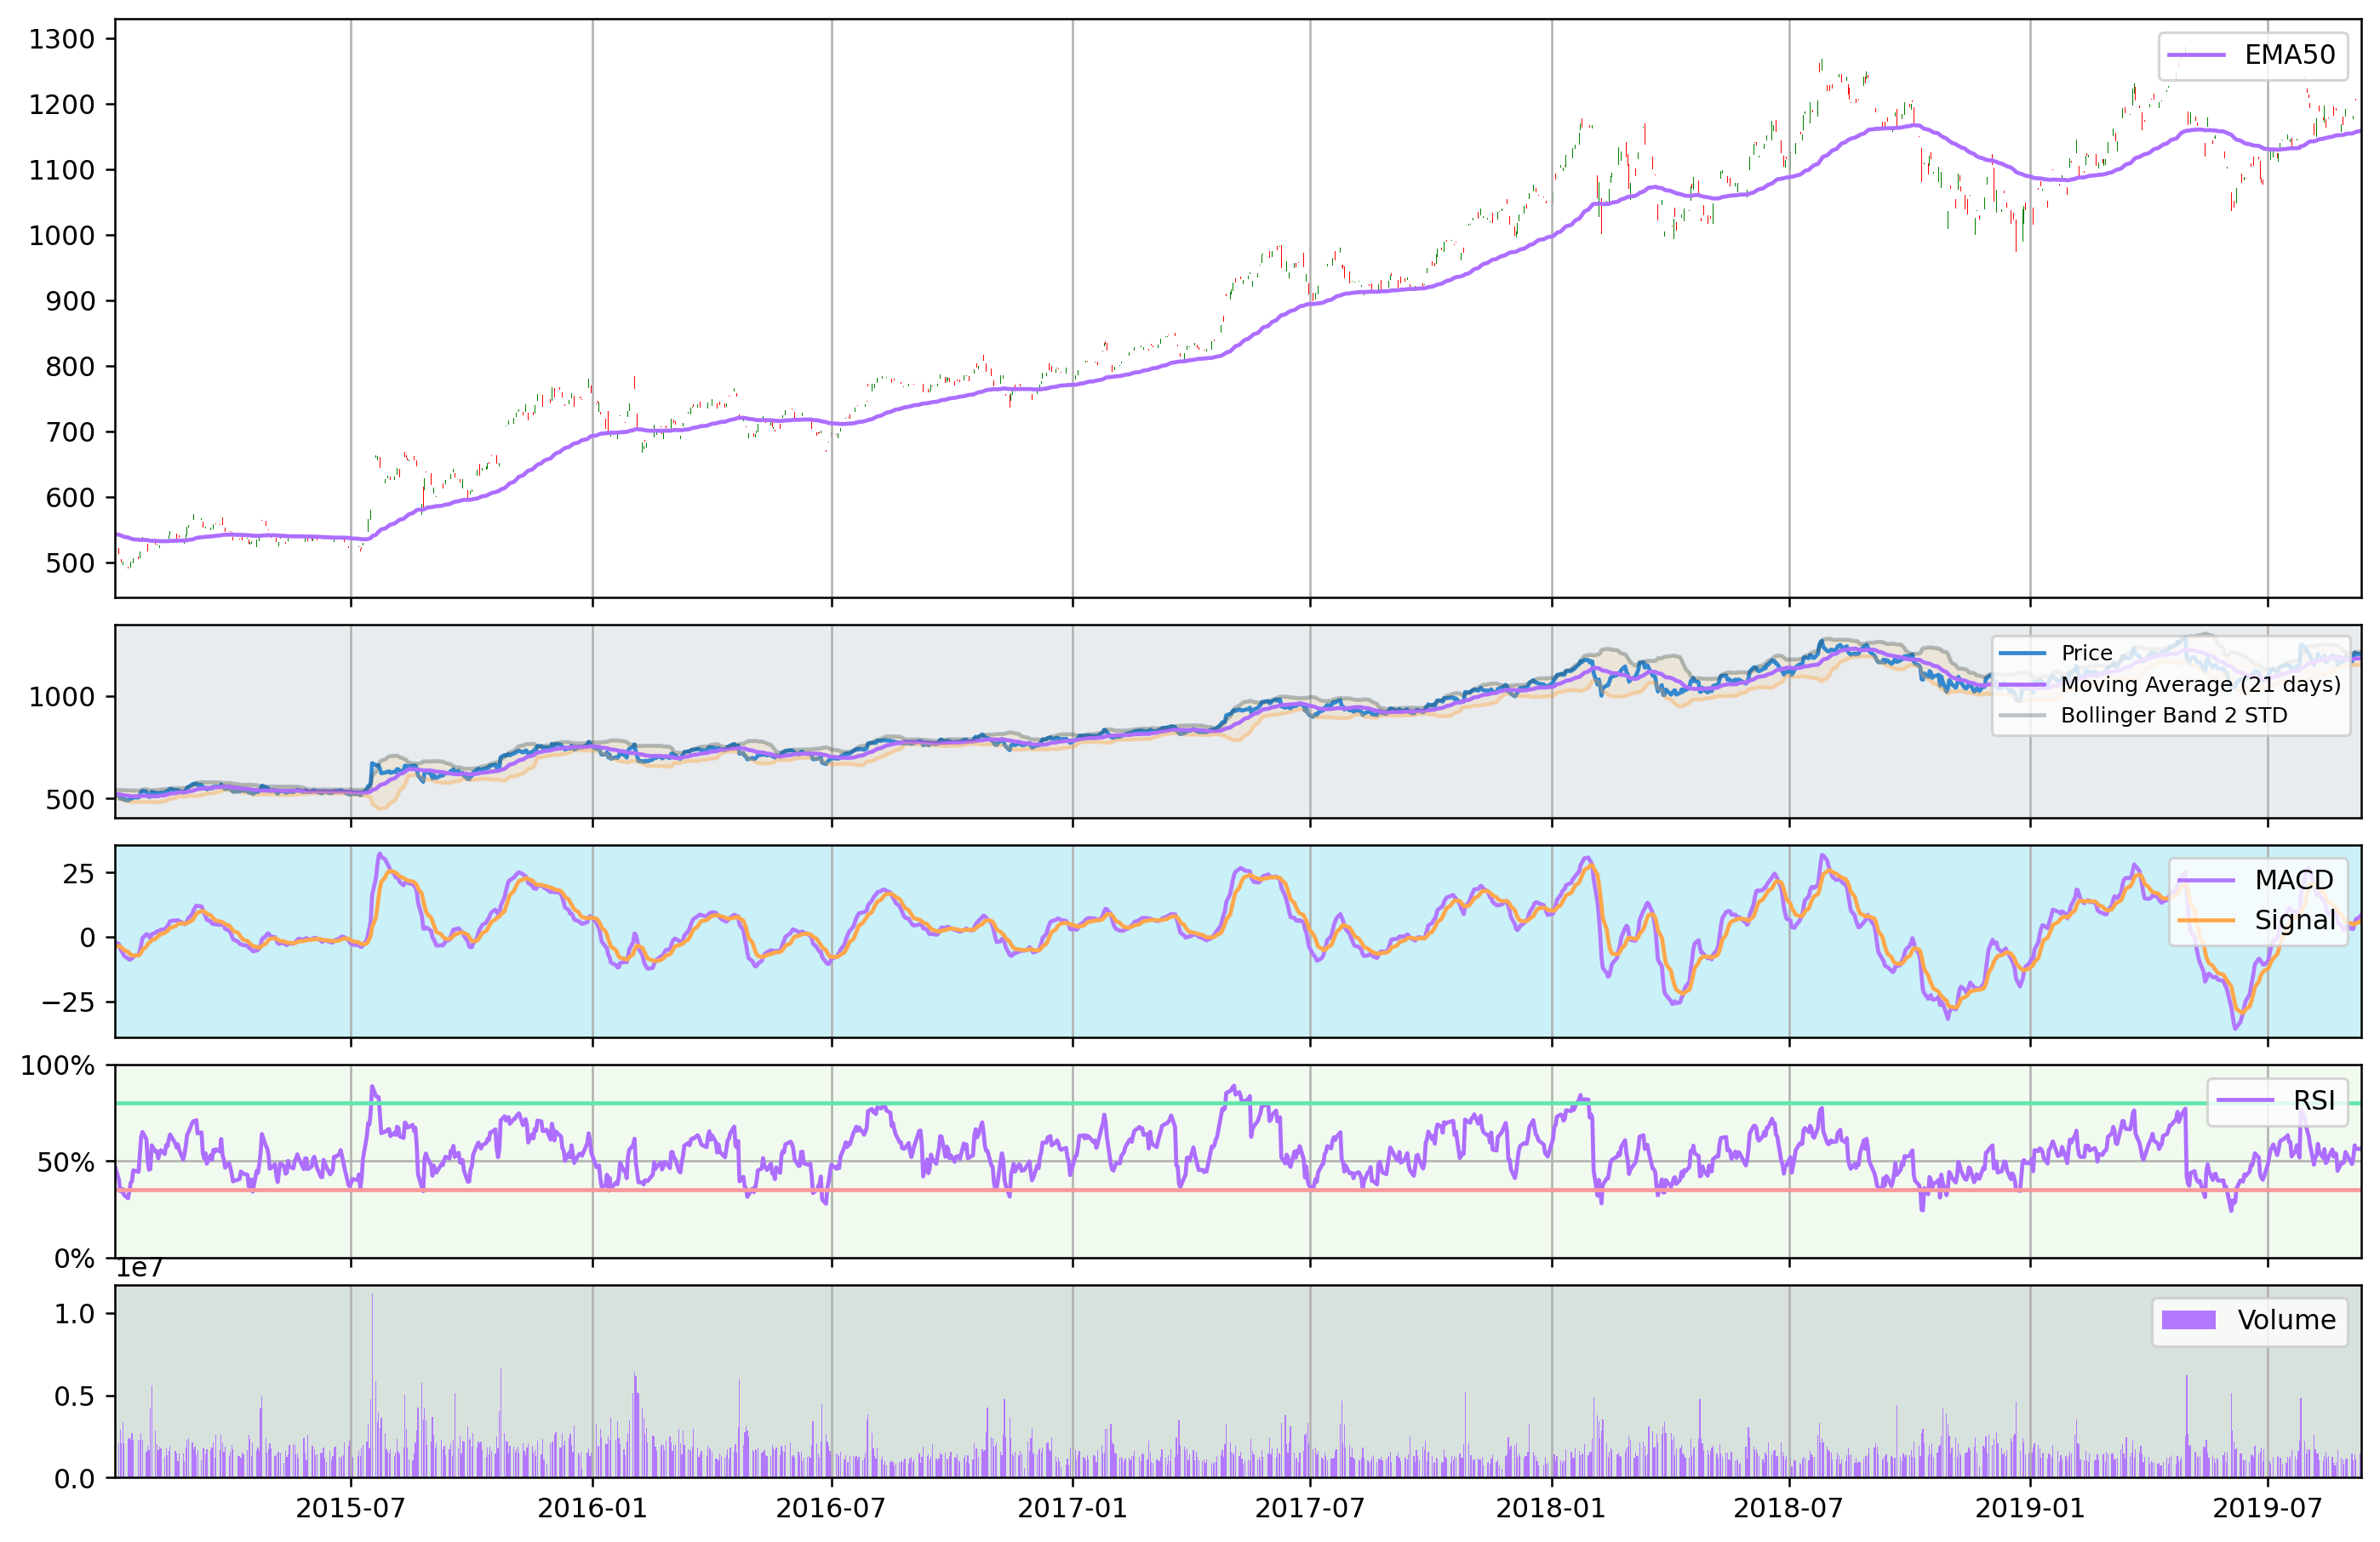

<IPython.core.display.Javascript object>

In [38]:
importlib.reload(plotting) #automatically updatet the module without reloading
plotting.stock_charts(stocks['goog'].loc['2015-01-01':'2021-07-01'])

In [41]:
stock = stocks['aapl'].loc['2015-01-01':'2021-07-01']

<IPython.core.display.Javascript object>

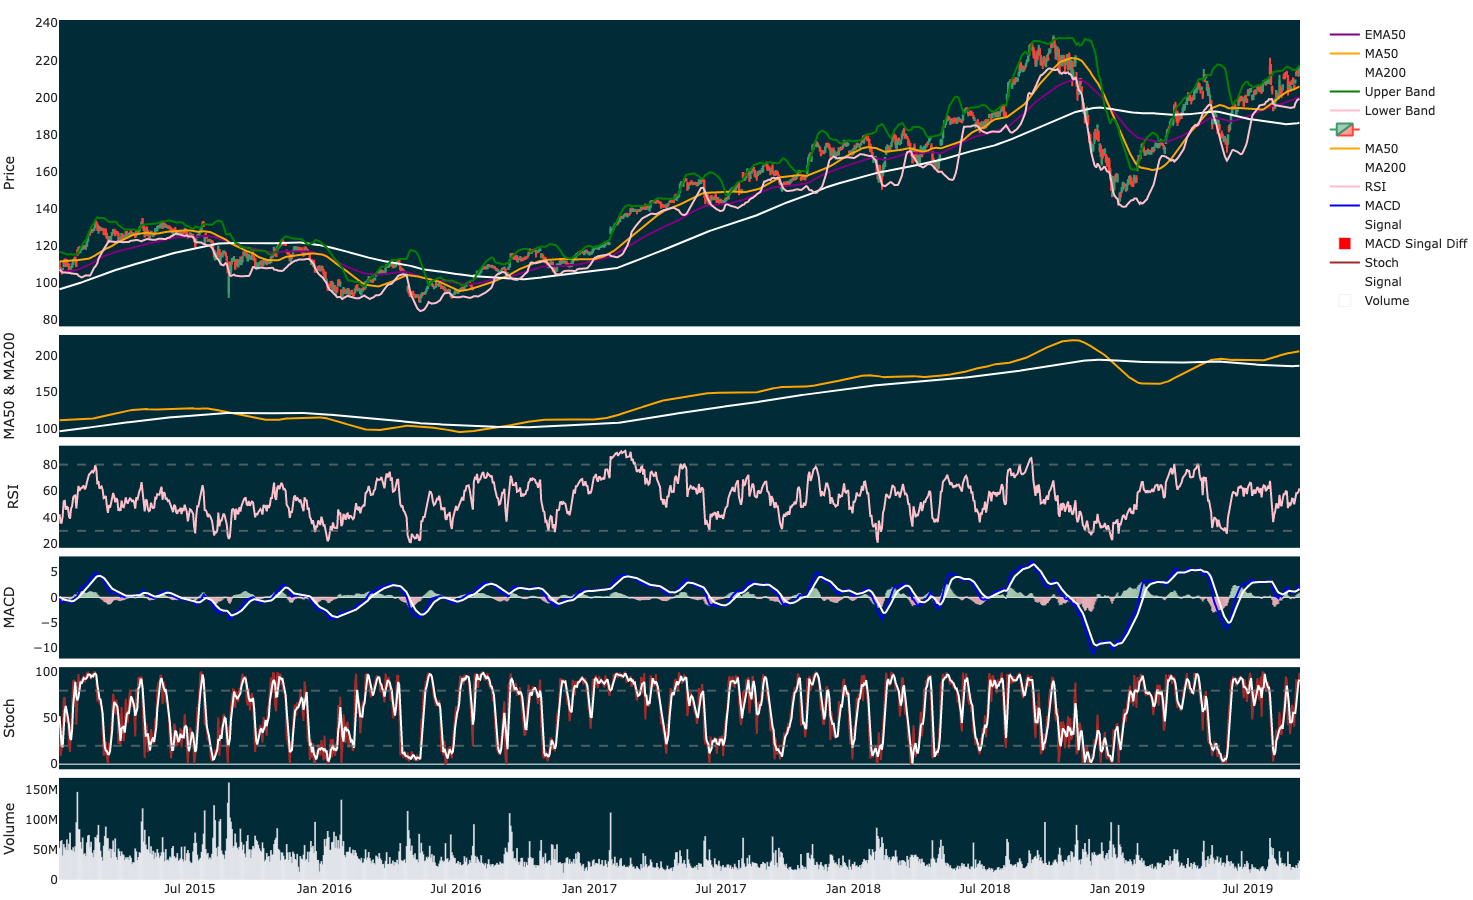

<IPython.core.display.Javascript object>

In [42]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# remove holidays or any dates
# build complete timeline from start date to end date
dt_all = pd.date_range(start=stock.index[0],end=stock.index[-1])
# retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(stock.index)]
# define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]


fig = make_subplots(rows=6, cols=1,shared_xaxes=True,row_heights=[0.6,0.2,0.2,0.2,0.2,0.2],vertical_spacing=0.01)



####################### EMA50, MA50 & MA200 #############################
fig.append_trace(go.Scatter(name = 'EMA50',
    x=stock.index,
    y=stock['EMA50'],
    marker_color='purple'
), row=1, col=1)
fig.append_trace(go.Scatter(name = 'MA50',
    x=stock.index,
    y=stock['MA50'],
    marker_color='orange'
), row=1, col=1)
fig.append_trace(go.Scatter(name = 'MA200',
    x=stock.index,
    y=stock['MA200'],
    marker_color='white'
), row=1, col=1)

#######################  Bollinger Bands ####################### 
fig.append_trace(go.Scatter(name = 'Upper Band',marker_color='green',
    x=stock.index,
    y=stock['Upper_band']), row=1, col=1, )
fig.append_trace(go.Scatter(name = 'Lower Band',marker_color='pink',
    x=stock.index,
    y=stock['Lower_band']), row=1, col=1)

####################### Candel #############################
fig.append_trace(go.Candlestick(name = '', x=stock.index,
                open=stock['Open'], high=stock['High'],
                low=stock['Low'], close=stock['Close'])
                     , row = 1, col = 1)

####################### Golden Cross: MA50 & MA200 #############################
fig.append_trace(go.Scatter(name = 'MA50',
    x=stock.index,
    y=stock['MA50'],
    marker_color='orange'
), row=2, col=1)

fig.append_trace(go.Scatter(name = 'MA200',
    x=stock.index,
    y=stock['MA200'],
    marker_color='white'
), row=2, col=1)

####################### RSI #############################
fig.append_trace(go.Scatter(name = 'RSI',
    x=stock.index,
    y=stock['RSI'],
    marker_color='pink'
), row=3, col=1)
fig.add_hline(y=80,row=3, col=1,opacity=0.6, line_width=2, line_dash='dash', line_color='grey'  )
fig.add_hline(y=30,row=3, col=1,opacity=0.6, line_width=2, line_dash='dash', line_color='grey')


####################### MACD #############################
colors = ['green' if val >= 0 
          else 'red' for val in stock['MACD Singal Diff']]

fig.add_trace(go.Scatter(name = 'MACD',x=stock.index, 
                     y=stock['MACD'],marker_color='blue'
                    ), row=4, col=1),
fig.add_trace(go.Scatter(name = 'Signal',x=stock.index, 
                     y=stock['Signal'],marker_color='white'
                    ), row=4, col=1),
fig.add_trace(go.Bar(name = 'MACD Singal Diff',x=stock.index, 
                     y=stock['MACD Singal Diff'],marker_color=colors
                    ), row=4, col=1),


####################### Stoch #############################
fig.add_trace(go.Scatter(name = 'Stoch',x=stock.index, 
                     y=stock['Stoch'],marker_color='brown'
                    ), row=5, col=1),
fig.add_trace(go.Scatter(name = 'Signal',x=stock.index, 
                     y=stock['Stoch Signal'],marker_color='white'
                    ), row=5, col=1),

fig.add_hline(y=80,row=5, col=1,opacity=0.6, line_width=2, line_dash='dash', line_color='grey')
fig.add_hline(y=20,row=5, col=1,opacity=0.6, line_width=2, line_dash='dash', line_color='grey')


####################### Volume #############################
fig.add_trace(go.Bar(name = 'Volume',x=stock.index, 
                     y=stock['Volume'],marker_color='white'
                    ), row=6, col=1),


####################### Plot Layout #############################
fig.update_layout(height=900, width=1200, 
                  showlegend=True, 
                  xaxis_rangeslider_visible=False,
                  plot_bgcolor = '#002b37',
                  xaxis_rangebreaks=[dict(values=dt_breaks)]) #remove gap dates

fig.update_yaxes(title_text="Price", showgrid=False,row=1, col=1)
fig.update_yaxes(title_text="MA50 & MA200", showgrid=False,row=2, col=1)
fig.update_yaxes(title_text="RSI", showgrid=False,row=3, col=1)
fig.update_yaxes(title_text="MACD", showgrid=False, row=4, col=1)
fig.update_yaxes(title_text="Stoch", showgrid=False,row=5, col=1)
fig.update_yaxes(title_text="Volume", showgrid=False,row=6, col=1)
fig.update_layout(template='seaborn')
fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)

# removing white spaces
fig.update_layout(margin=go.layout.Margin(
        l=20, #left margin
        r=0, #right margin
        b=20, #bottom margin
        t=20  #top margin
    ))


fig.show()

### Return by Month

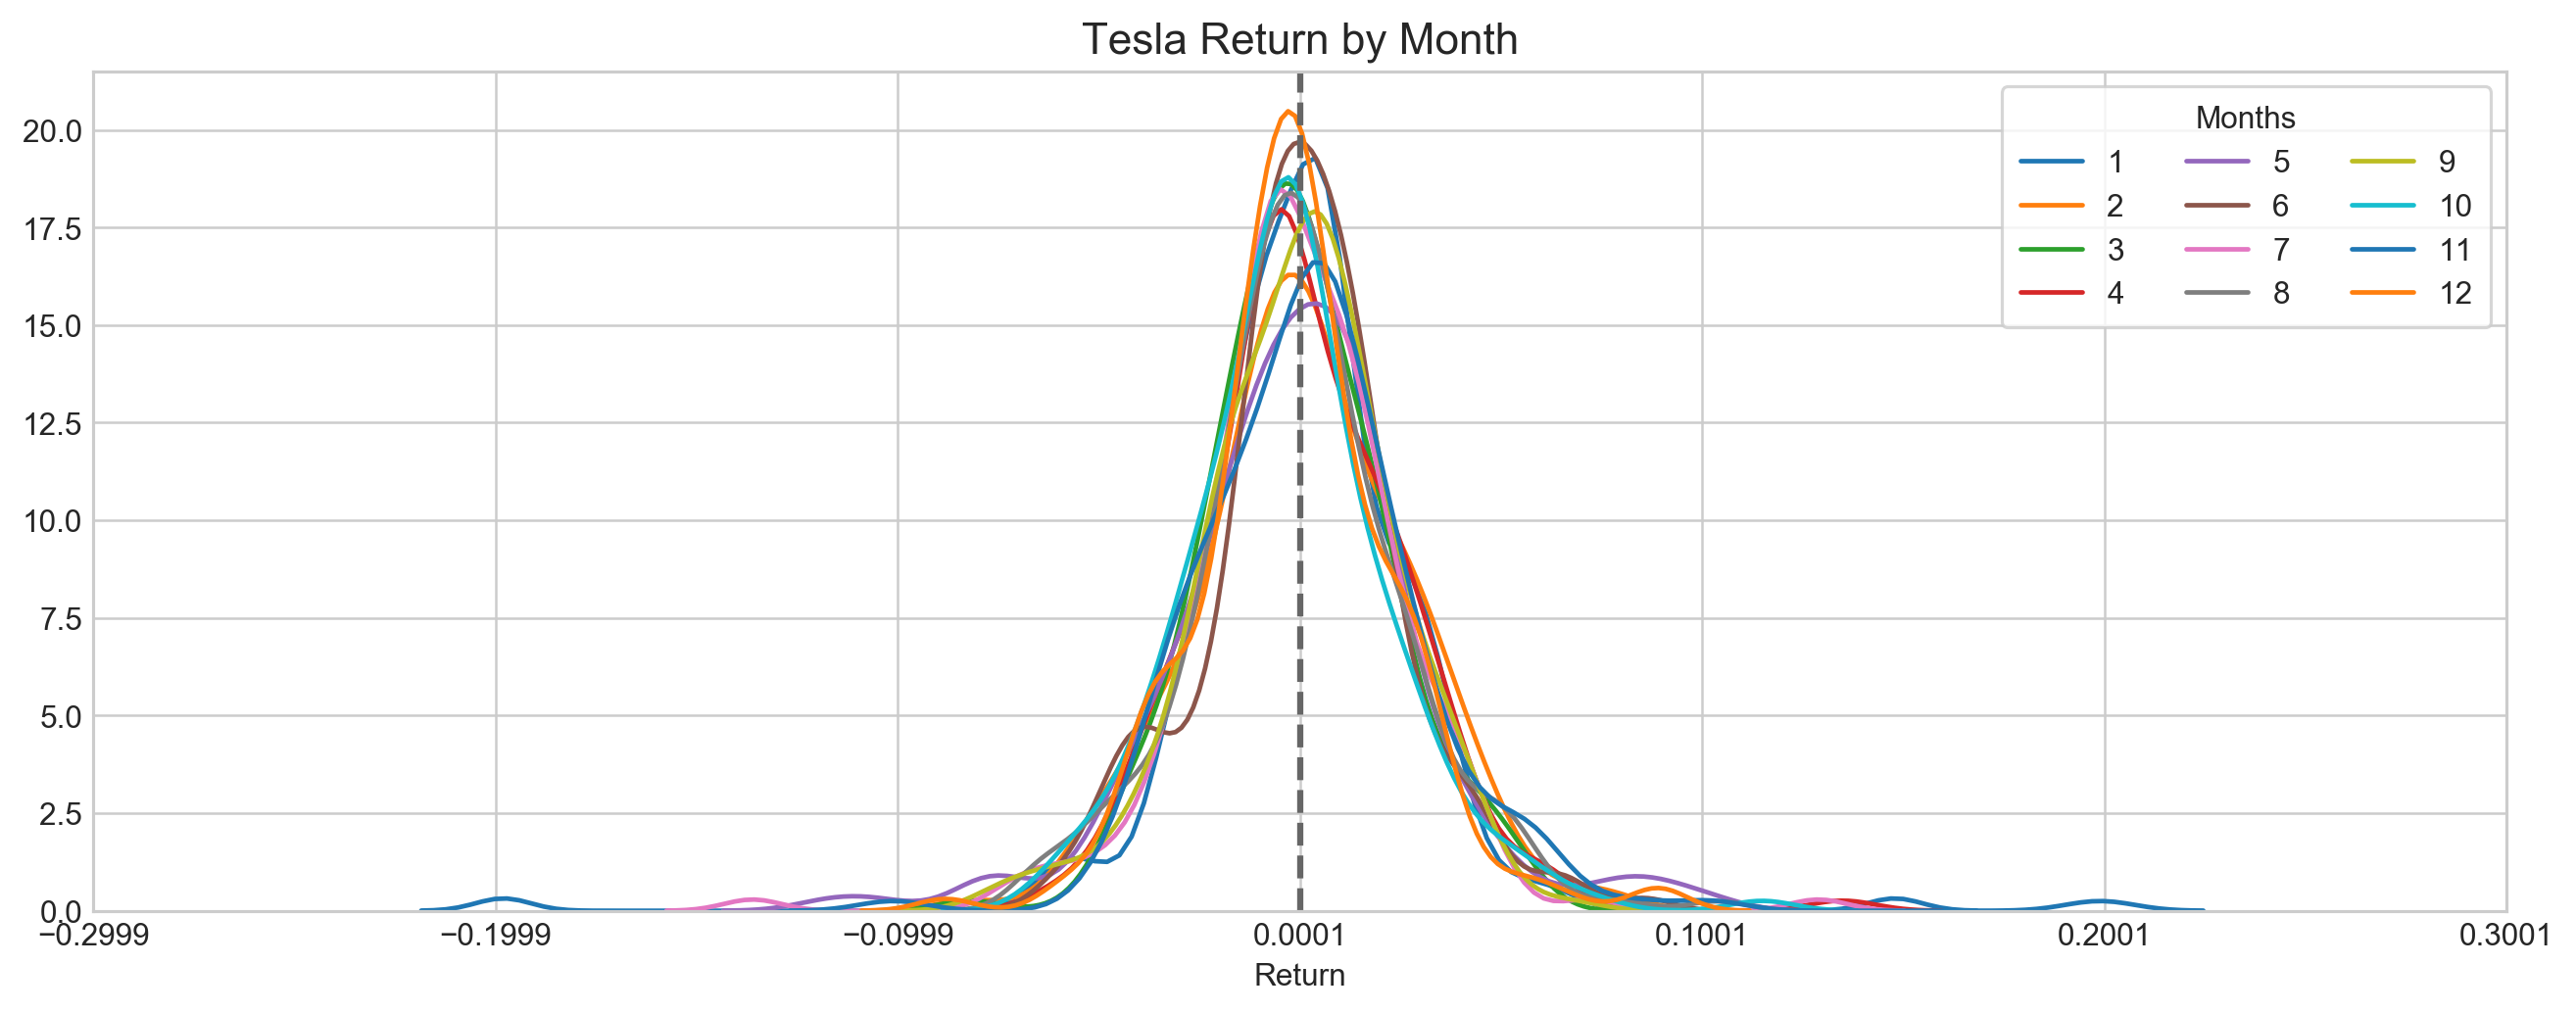

In [11]:
plt.figure(figsize=(14,5))
plt.style.use('seaborn-whitegrid')
for i in range(1,13):
    volatility = stocks['tsla'][stocks['tsla'].index.month==i].Return
    sns.distplot(volatility, hist=False, label=i)
    plt.legend(frameon=True, loc=1, ncol=3, fontsize=10, borderpad=.6, title='Months')
plt.axvline(stocks['tsla'].Return.mean(), color='#666666', ls='--', lw=2)
plt.xticks(plt.xticks()[0] + stocks['tsla'].Return.mean())
plt.title('Tesla Return by Month', fontsize=14)
plt.show()

### Returns for Each Day of the Month

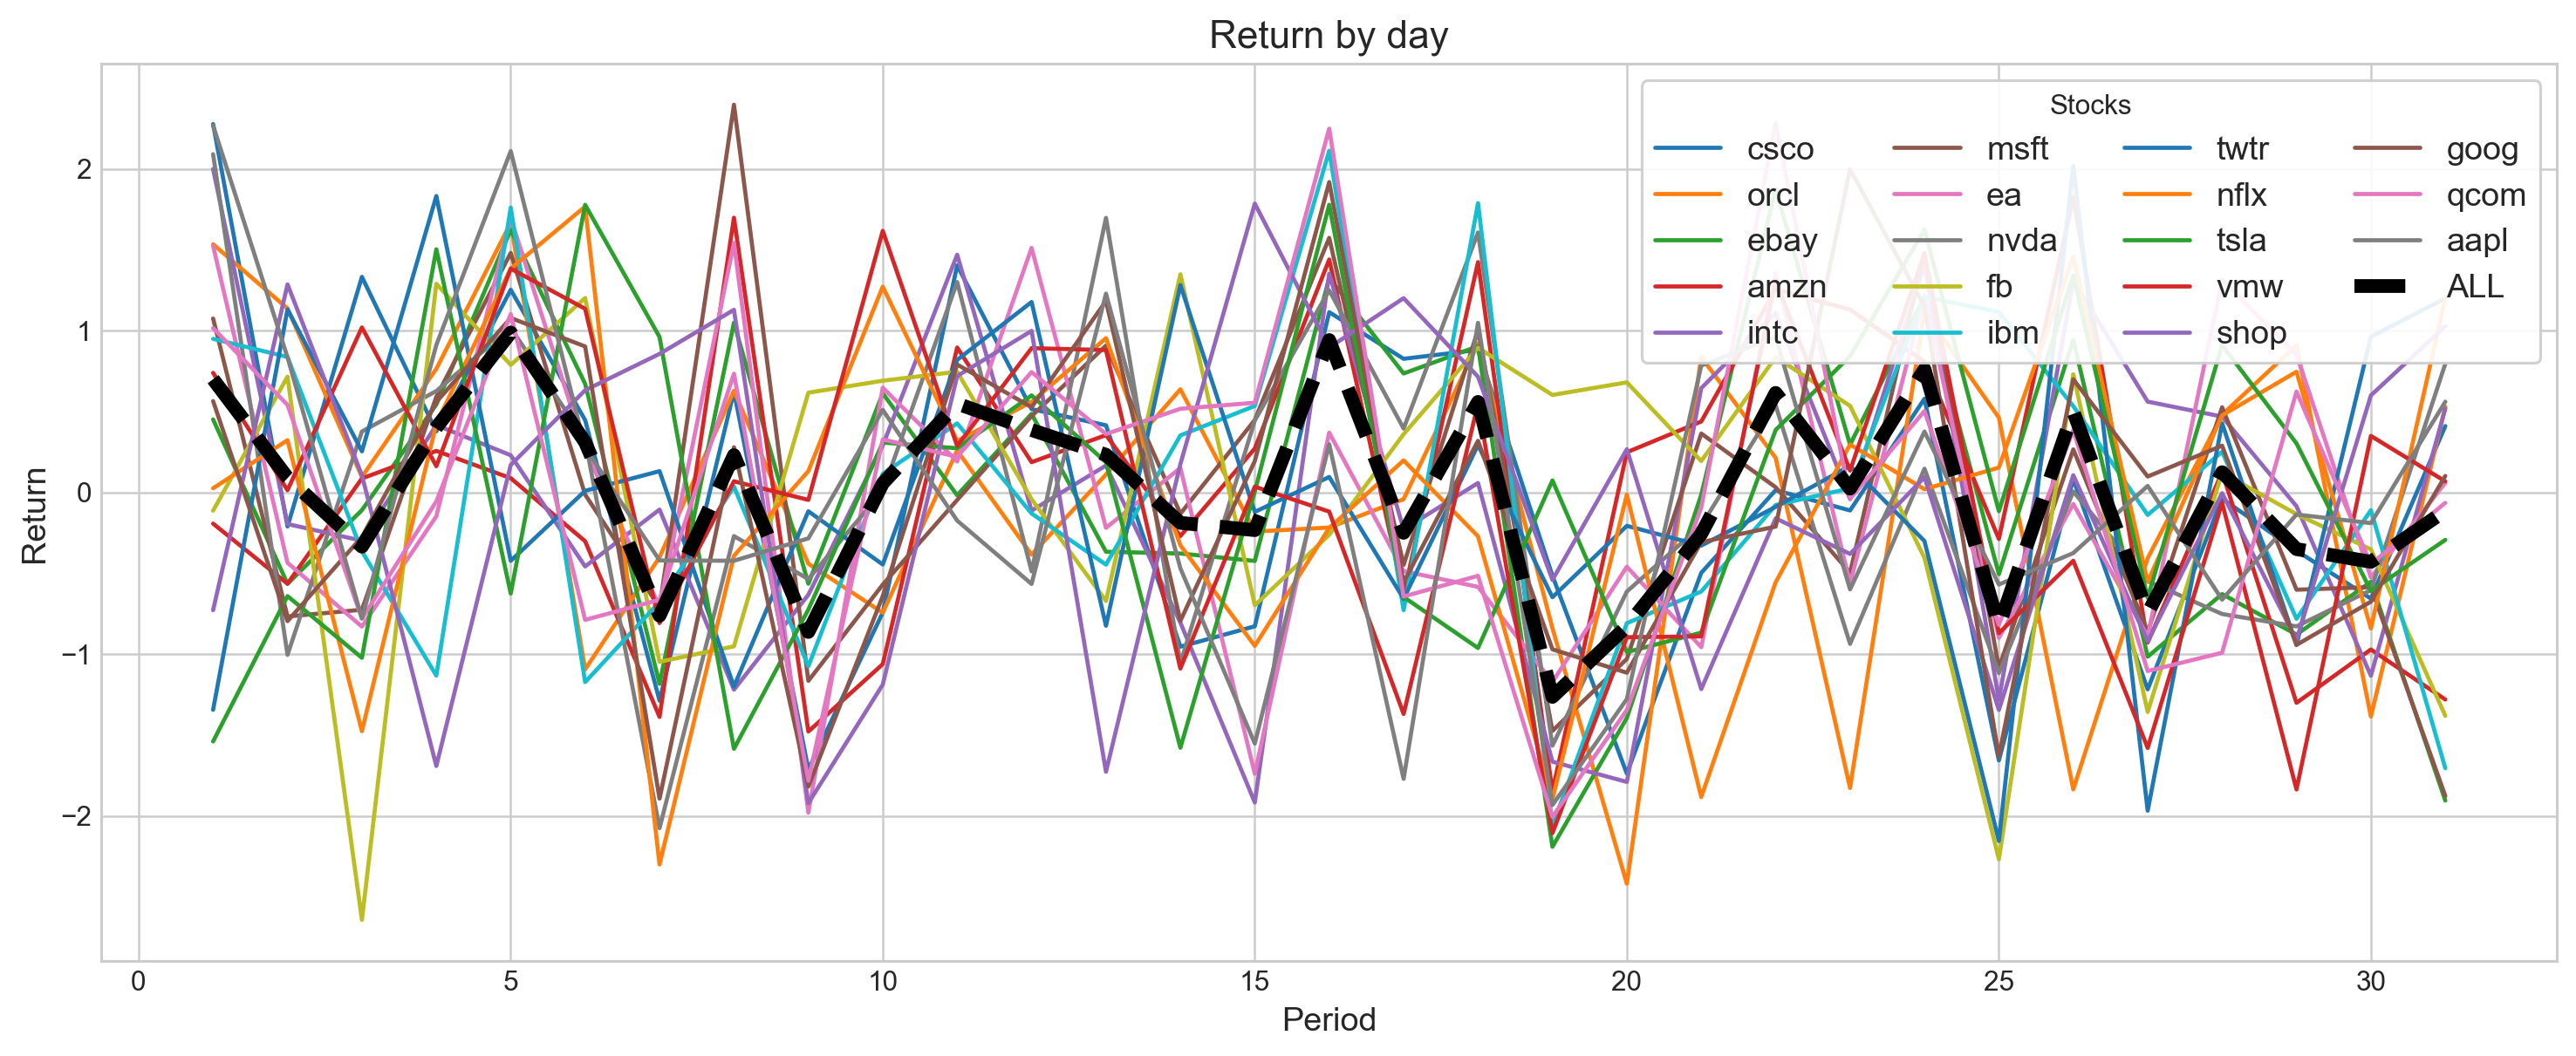

In [12]:
plotting.compare_stocks(stocks, value='Return', by='day', scatter=False)

### Returns for Each Month of the Year

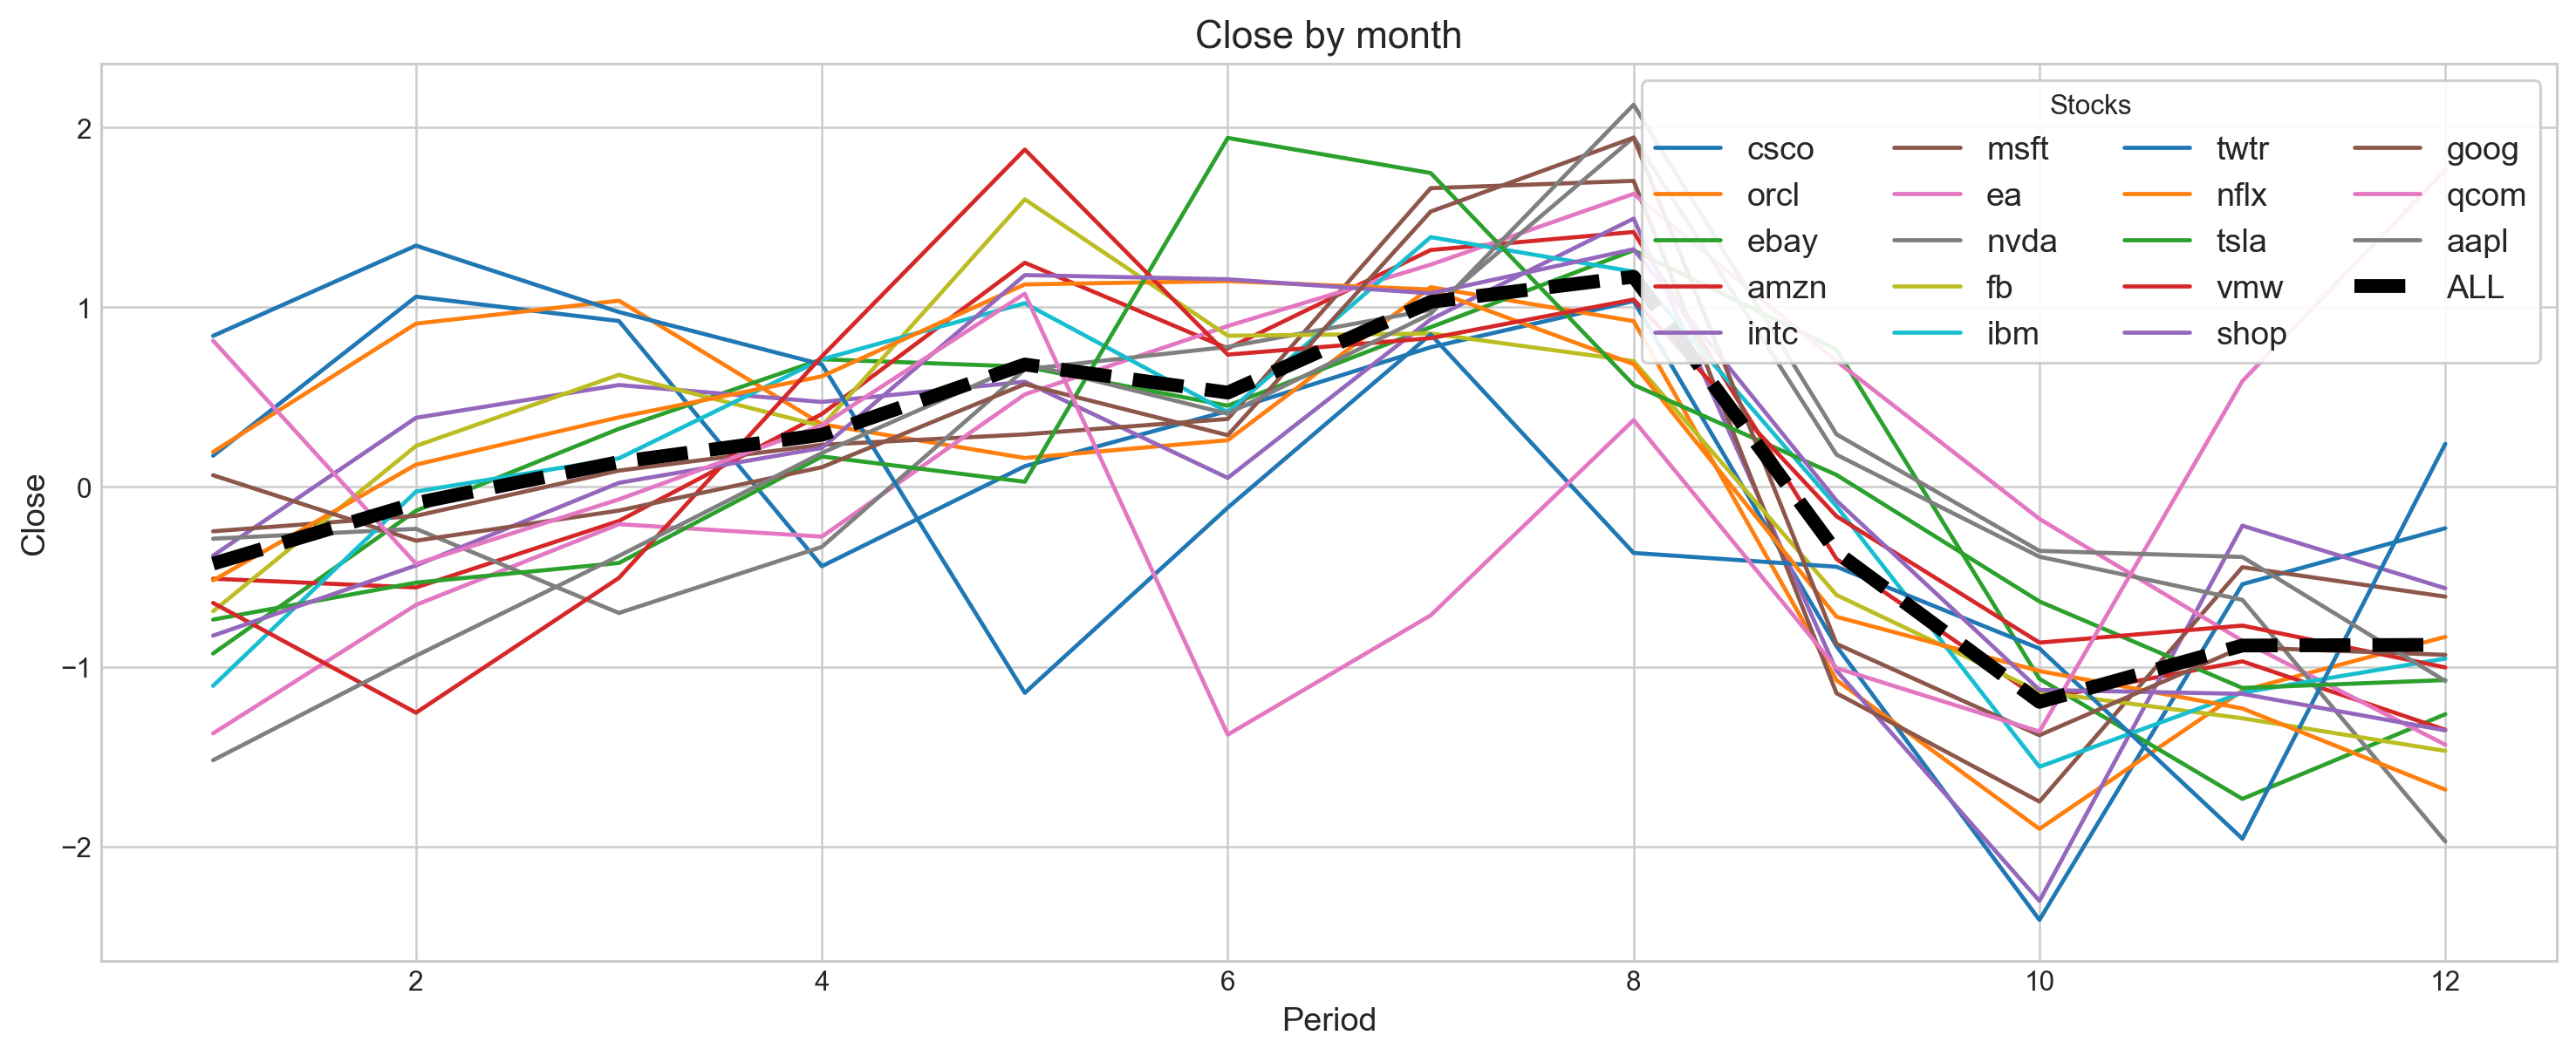

In [13]:
plotting.compare_stocks(stocks, value='Close', by='month', scatter=False)

### Combined Daily Return for Multiple Stocks

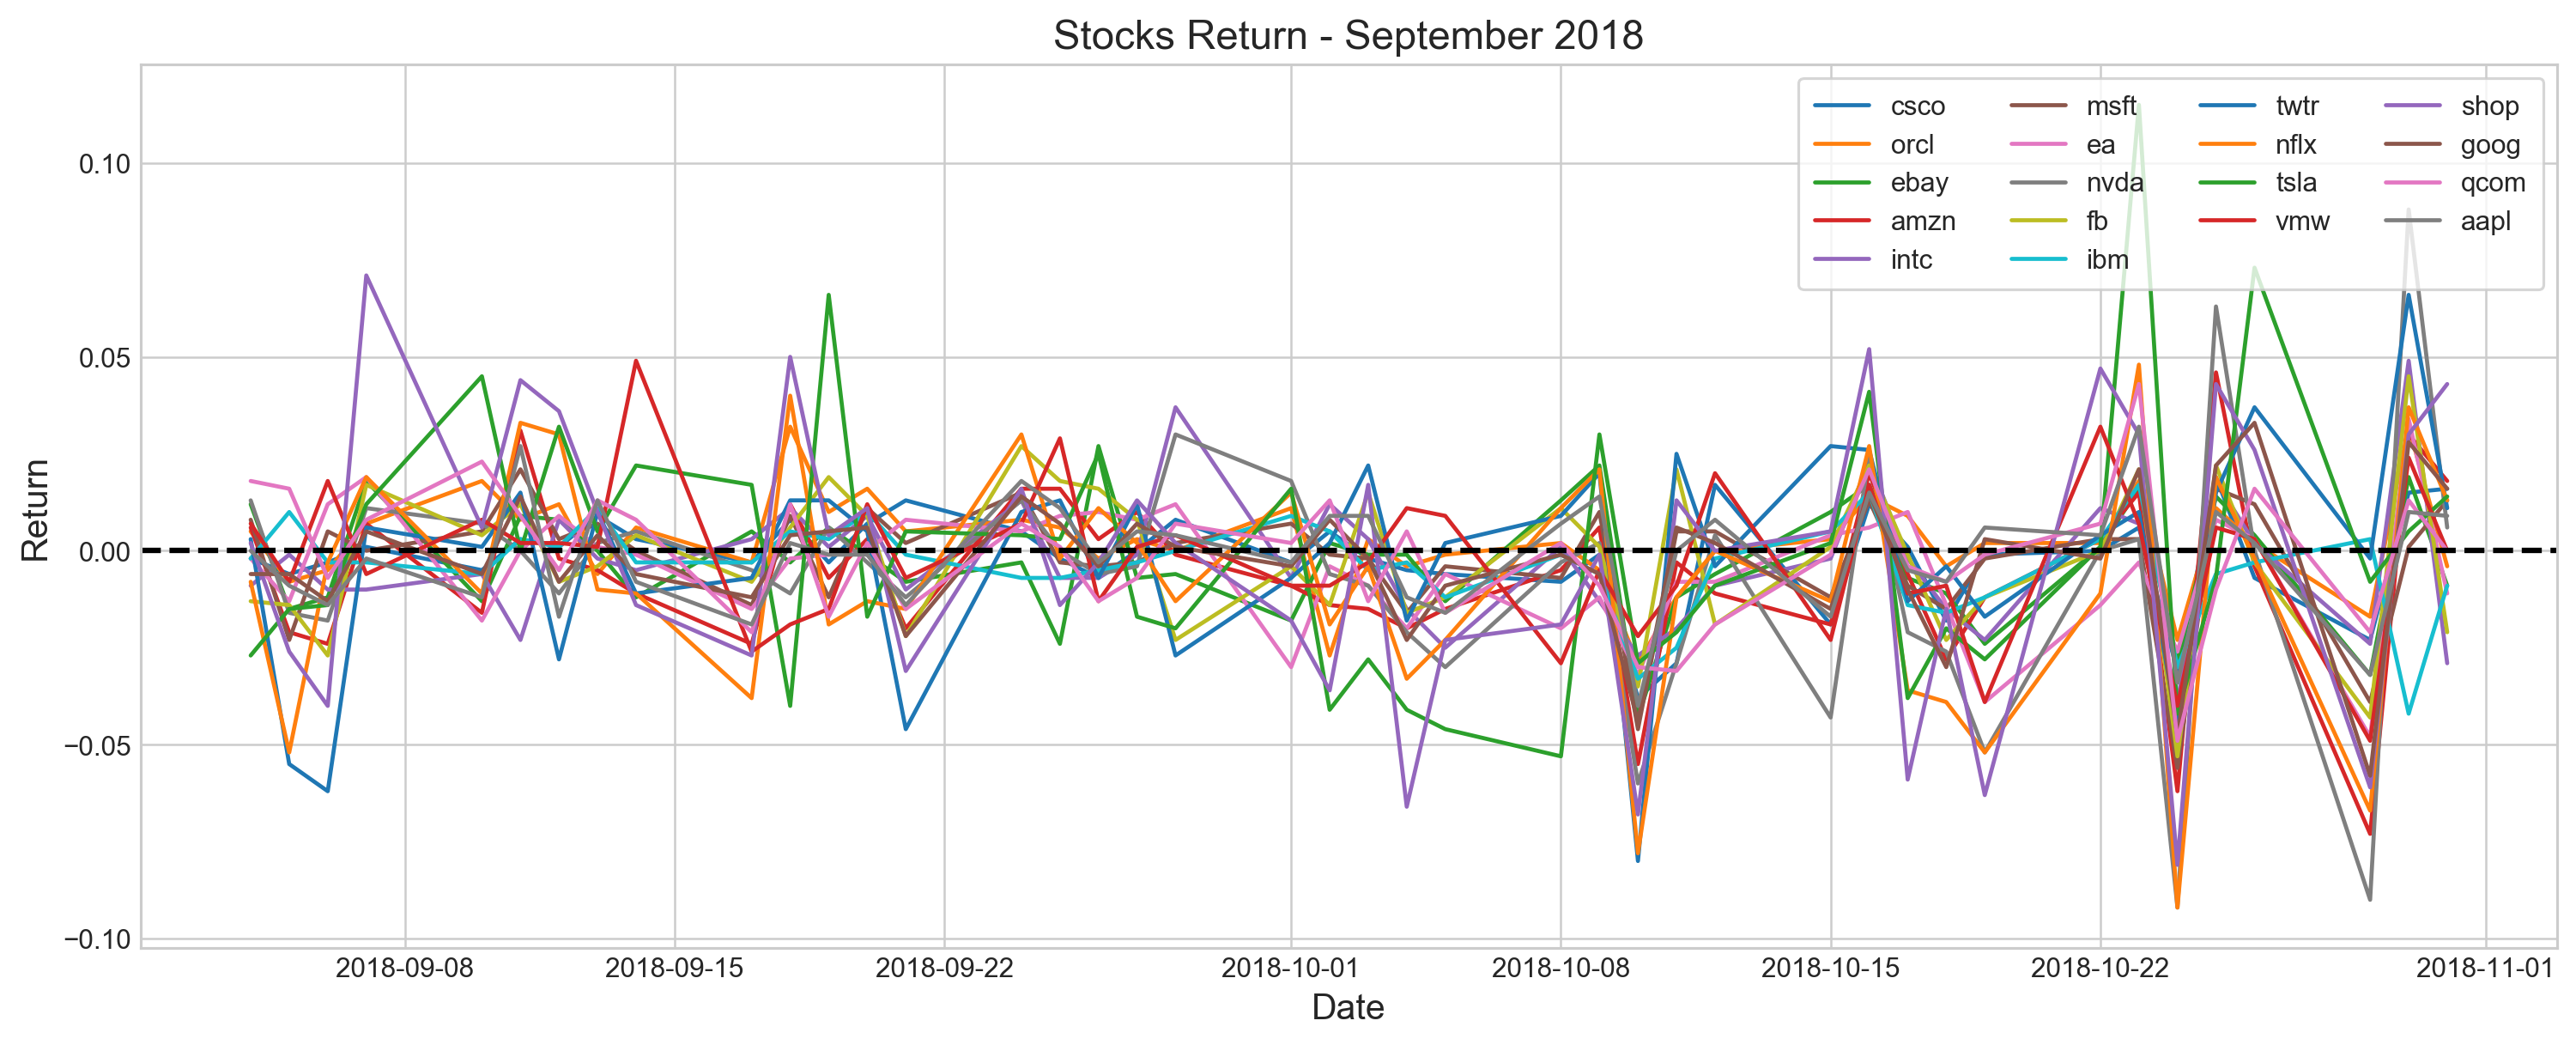

In [14]:
stocks_return_correlation = {}

plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(16,6))
plt.style.use('seaborn-whitegrid')
for i in stocks:    
    stocks_return_correlation[i] = stocks[i].loc['2018-9':'2018-10'].Return
    plt.plot(stocks[i].loc['2018-9':'2018-10'].Return, label=i)
    plt.legend(frameon=True, loc=1, ncol=4, fontsize=10, borderpad=.6)
plt.title('Stocks Return - September 2018', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Return', fontsize=13)
plt.axhline(0, c='k', lw=2, ls='--')
plt.show()

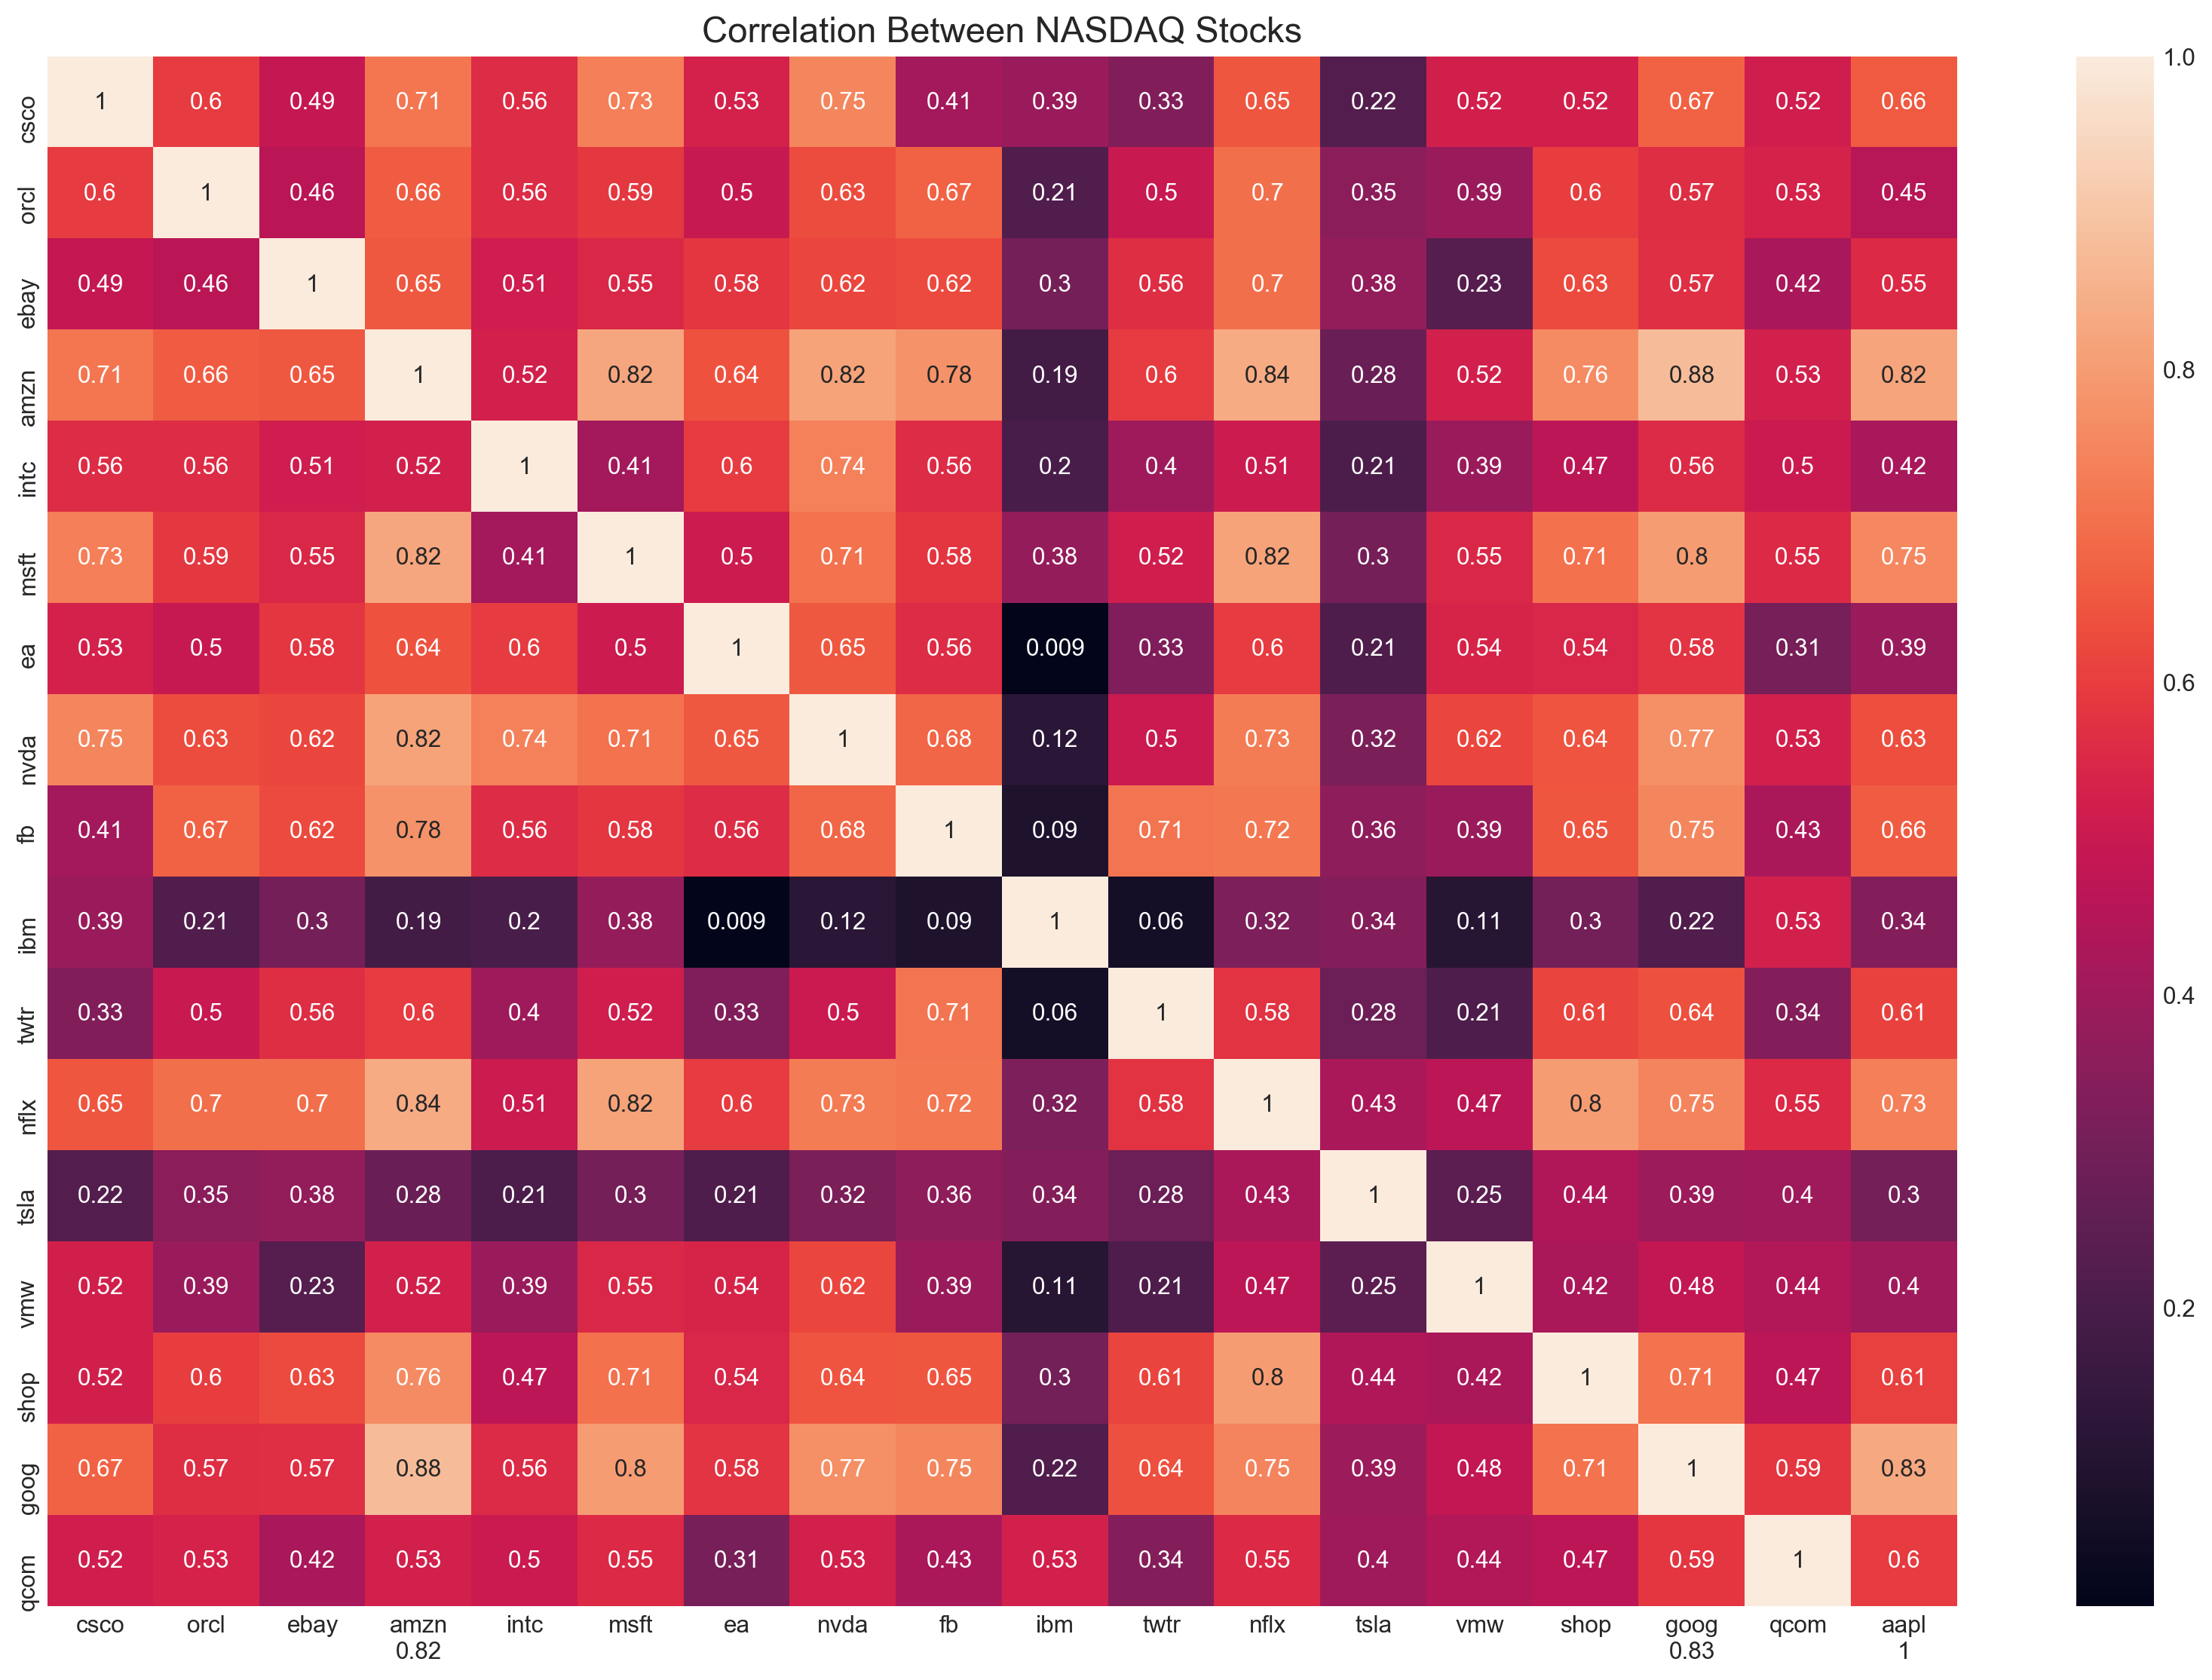

In [39]:
plt.figure(figsize=(18,12))
sns.heatmap(pd.DataFrame(stocks_return_correlation).corr(), annot=True)
plt.ylim(17, 0)
plt.title('Correlation Between NASDAQ Stocks', fontsize=15)
plt.show()

In [16]:
stocks_corr = {}

for i in stocks:
    stock1 = stocks[i].loc['2018':'2019'].Return
    c = {}
    for j in stocks:
        stock2 = stocks[j].loc['2018':'2019'].Return
        if i != j :
            c[j] = np.corrcoef(stock1, stock2)[0][1]
    m = max(c.items(), key=operator.itemgetter(1))
    stocks_corr[(i+"-"+m[0])] = [m[1]]

In [17]:
pd.DataFrame(stocks_corr).T.sort_values(by=0, ascending=False).head(10)

0
goog-amzn  0.794676
amzn-goog  0.794676
msft-goog  0.783769
csco-msft  0.735654
aapl-msft  0.731158
fb-goog    0.729484
nflx-amzn  0.723289
nvda-amzn  0.707795
orcl-msft  0.653197
shop-amzn  0.636029

### High-Low and Price

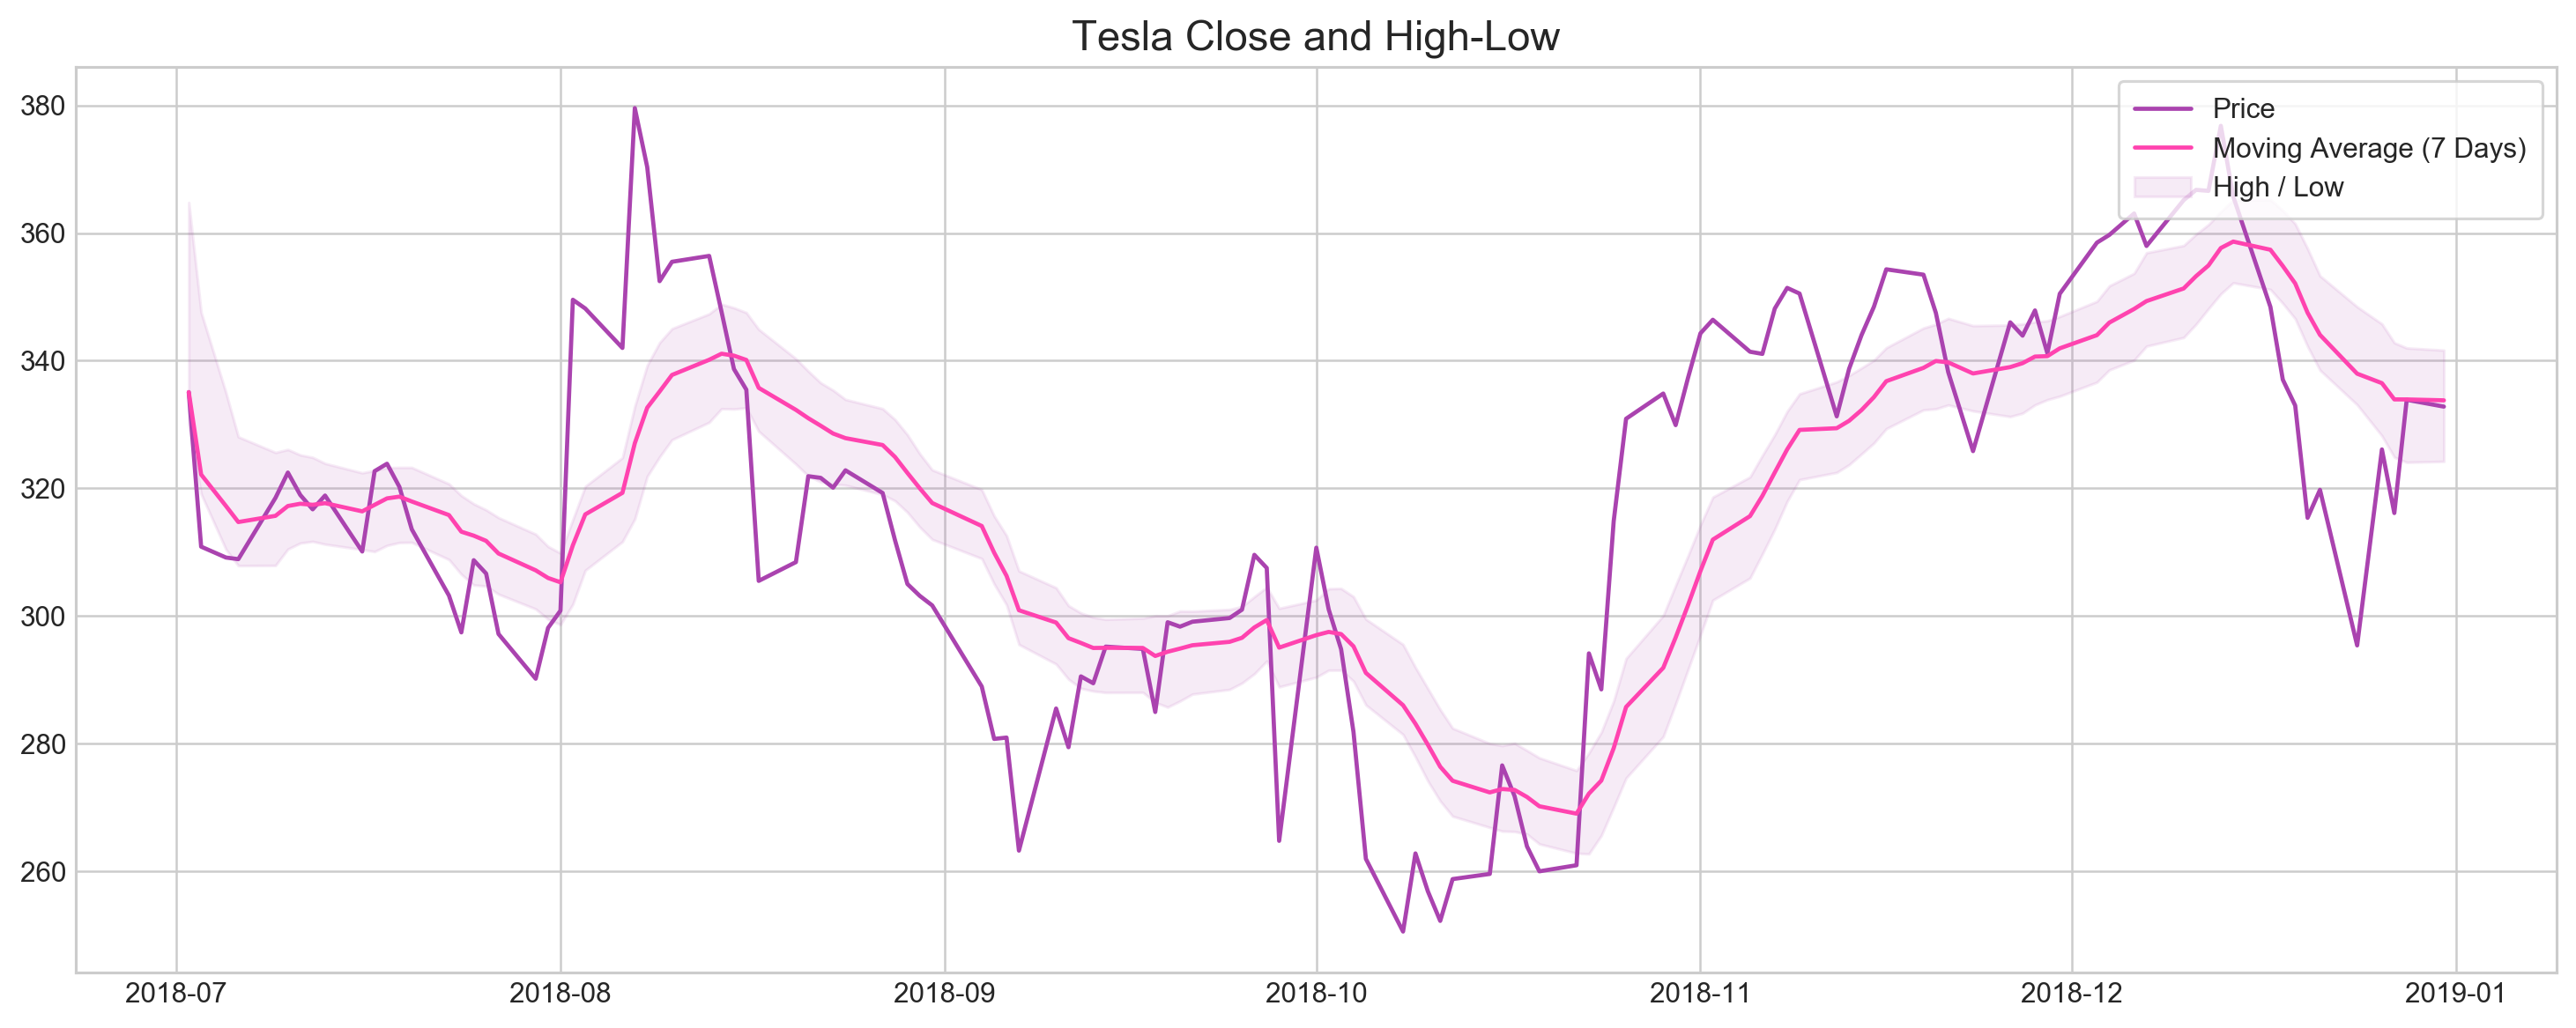

In [22]:
plt.figure(figsize=(16,6))

s = stocks['tsla'].loc['2018-7':'2018']
u = s.High.ewm(7).mean()
l = s.Low.ewm(7).mean()
plt.fill_between(s.index, u, l, color='#af43af', alpha=0.1, label='High / Low')
plt.plot(s.Close, color='#aa43af', label='Price')
plt.plot(s.Close.ewm(7).mean(), color='#ff43af', label='Moving Average (7 Days)')
plt.legend(frameon=True, loc=1, borderpad=.6)
plt.title('Tesla Close and High-Low', fontsize=15)
plt.show()

### Checking for Normality

Machine learning algorithms, including Neural Networks heavily rely on probability in learning process. Let's check target variable `Return` to normality.

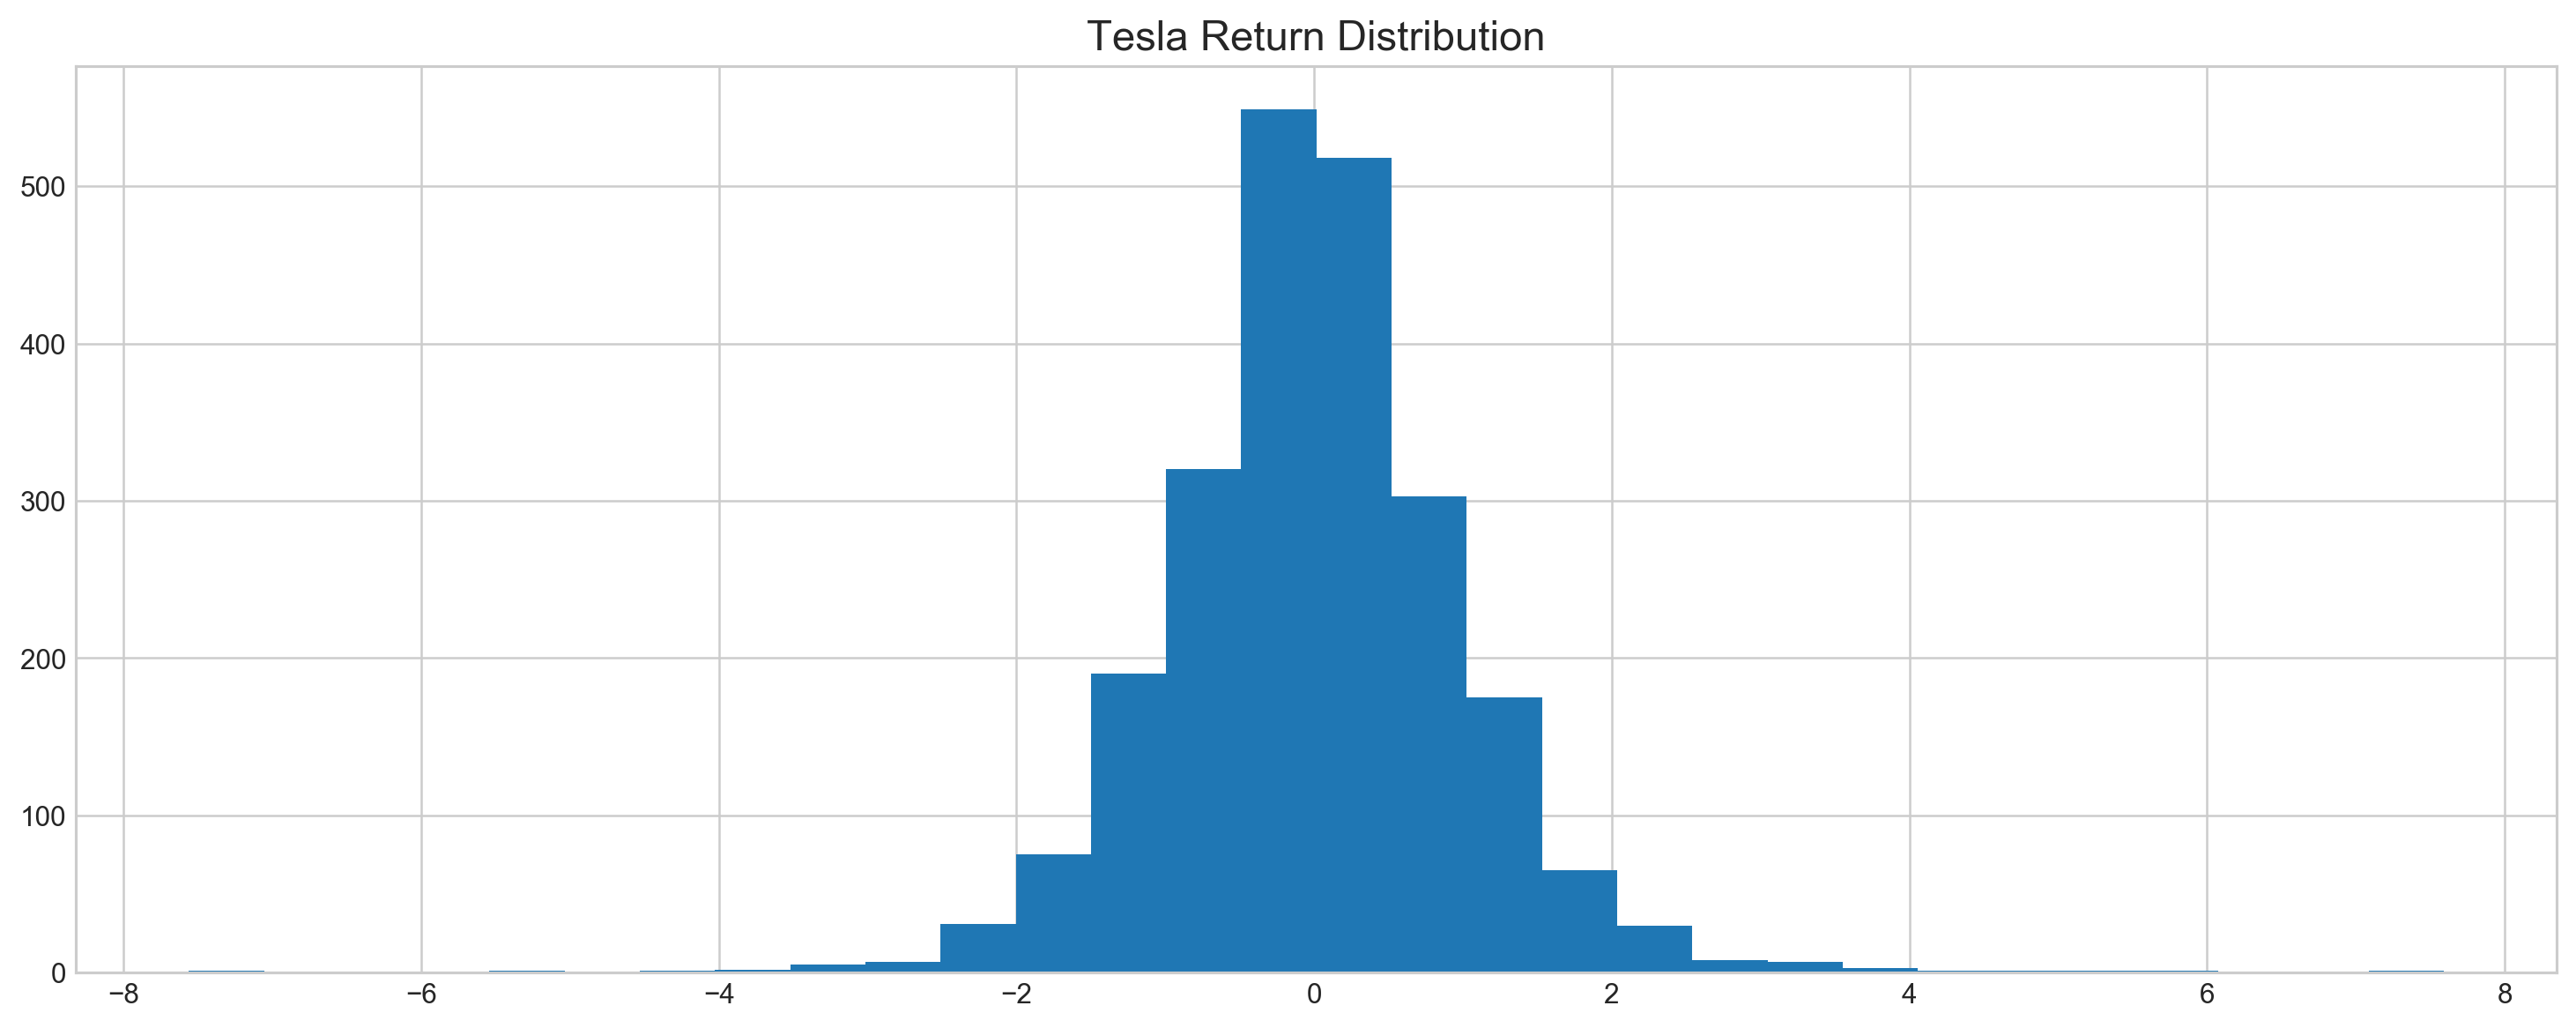

In [115]:
z = lambda x: (x - x.mean()) / x.std()

plt.hist(z(stocks['tsla'].Return), bins=30)
plt.title('Tesla Return Distribution', fontsize=15)
plt.show()

<Figure size 3632x1362 with 0 Axes>

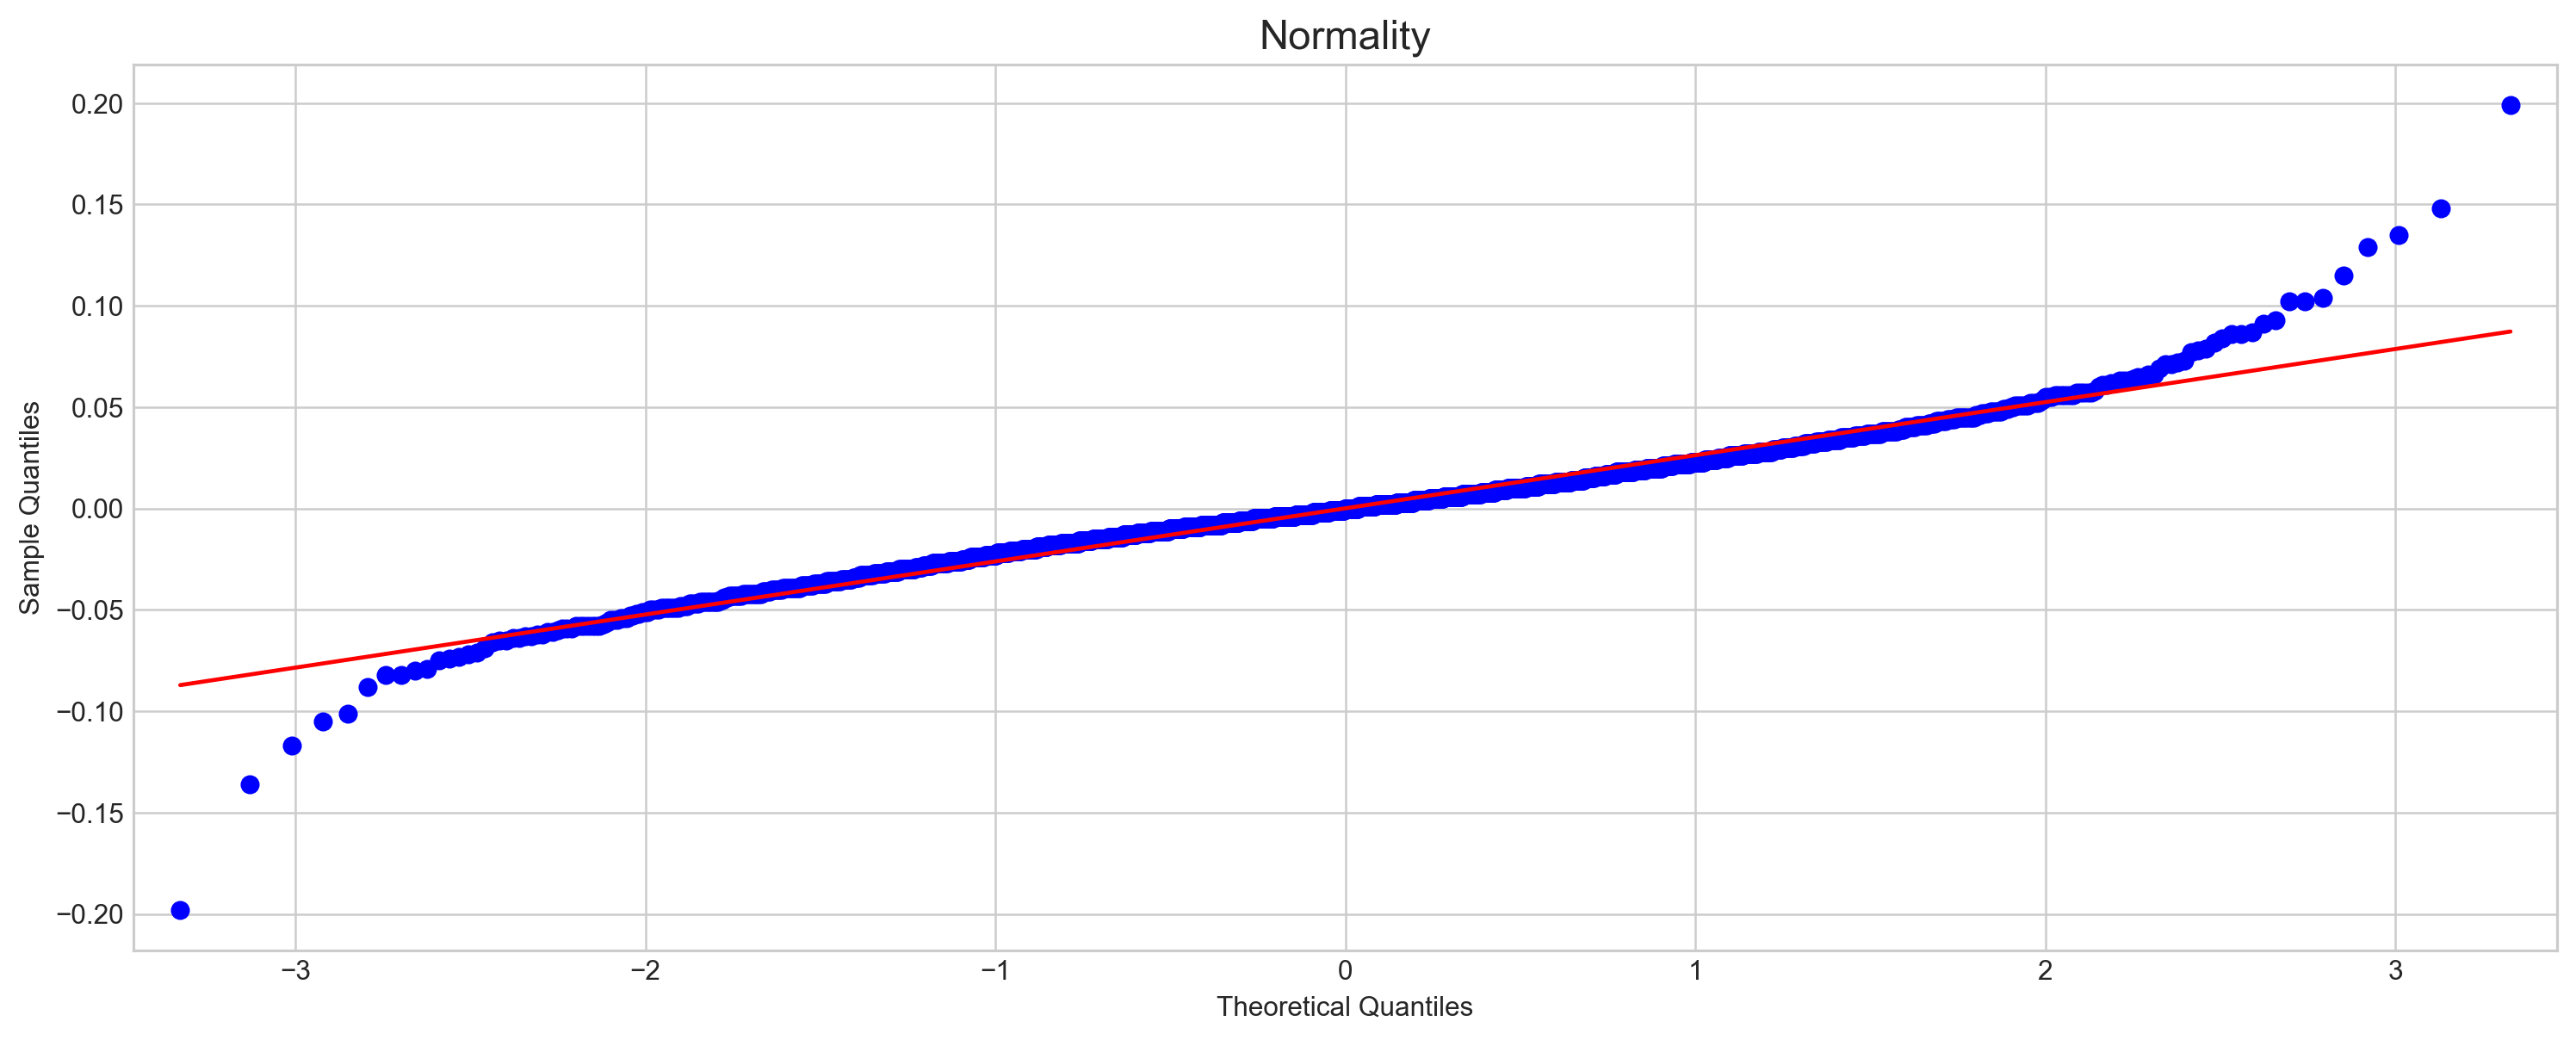

In [103]:
plt.figure(figsize=(16,6))
plt.rcParams['figure.dpi'] = 227
sm.qqplot(stocks['tsla'].Return, line='s', scale=1)
plt.rcParams['figure.figsize'] = [16.0, 6.0]
plt.title('Normality', fontsize=15)
plt.show()

# Conclusion

- `Return` has 64% correlation with `Change` feature. 
- `Close` value stays inside Bollinger Bands
- `Return` feature mostly normal
